In [10]:
# 目标在shortstay的数据表上添加一条特征，每个grid的隶属区域。

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [12]:
area=pd.read_csv('area_passenger_info.csv',header=None
                ,names=['ID','area_name','area_type','Center_x','Center_y','Grid_x','Grid_y','area'])

In [15]:
# +1 有待考虑，面积越大，周围可能包含更多的未被完全覆盖的网格
n_grid = area['area'].values/40000+2
n_grid = n_grid.astype(int)
# n_grid表示每个区域包含的grid数量
# 为了便于计算，去除几个极大的

# for id,i in enumerate(n_grid):
#     if i>20:
#         n_grid[id]=20

area['n_grid'] = n_grid
n_grid.max()


543

In [38]:
shortstay = pd.read_csv('shortstay_20200117_20200131.csv', header=None,delimiter='\t',
                    names=['date','hour','grid_x','grid_y','index'])

In [111]:
grid = shortstay[['grid_x', 'grid_y']].drop_duplicates()
grid = grid.sort_values(by=['grid_x', 'grid_y'], ascending=[True, True])

In [16]:
# 给区域分配网格
# 寻找每个区域中心的n_grid近邻，将这些grid划分到该区域里面。

area_center=list(zip(area['Center_x'], area['Center_y']))
area_grid = list(zip(area['Grid_x'], area['Grid_y']))
grid_list = list(zip(grid['grid_x'], grid['grid_y']))

(array([416., 174.,  92.,  47.,  32.,  25.,  20.,  15.,  11., 165.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

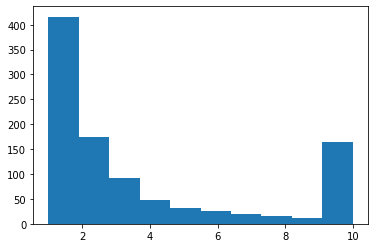

In [37]:
plt.hist(n_grid)

In [112]:
%%time
eps=0.0206
# 便利每个区域中心，寻找n_grid近邻，并给他们分配标签
for idx, center in enumerate(area_center):
    candidates = grid.loc[(np.fabs(grid['grid_x'].values-center[0])<=eps) & (np.fabs(grid['grid_y'].values-center[1])<=eps)]
    # 确保近邻grid的候选数量大于该区域的n_grid.
    assert len(candidates) >= n_grid[idx]
    # 在candidate里面找近邻
    neighbors = []
    for ind in candidates.index:
        
        x,y = candidates.loc[ind, ['grid_x','grid_y']]
        distence = max(np.fabs(x-center[0]), np.fabs(y-center[1]))
        neighbors.append((ind,distence))

    neighbors.sort(key=lambda s:-s[1])
    neighbors = neighbors[:n_grid[idx]]
    for item in neighbors:
        grid.loc[item[0], 'in_area'] = idx+1

grid['grid_id'] = np.arange(1, len(grid)+1)
grid.to_csv('grid_info.csv')
grid

CPU times: user 7min 34s, sys: 800 ms, total: 7min 35s
Wall time: 7min 40s


,grid_x,grid_y,in_area,grid_id
6387106,115.994279,39.870333,NaN,1
4760617,115.994279,40.114915,NaN,2
537115,115.994279,39.868949,NaN,3
56129,115.994279,39.867565,309.0,4
1234819,115.994279,39.749792,NaN,5
...,...,...,...,...
61338,116.747278,40.049541,NaN,141334
76783,116.747278,40.172307,NaN,141335
5658328,116.747279,40.168172,NaN,141336
80033,116.747279,40.170929,NaN,141337


In [2]:
grid_strength=pd.read_csv('datafountain_competition_od.txt',sep='\t',header=None
                ,names=['hour','start_grid_x','start_grid_y','end_grid_x','end_grid_y','Index'])
grid = pd.read_csv('grid_info.csv')
grid

,Unnamed: 0,grid_x,grid_y,in_area,grid_id
0,6387106,115.994279,39.870333,NaN,1
1,4760617,115.994279,40.114915,NaN,2
2,537115,115.994279,39.868949,NaN,3
3,56129,115.994279,39.867565,309.0,4
4,1234819,115.994279,39.749792,NaN,5
...,...,...,...,...,...
141333,61338,116.747278,40.049541,NaN,141334
141334,76783,116.747278,40.172307,NaN,141335
141335,5658328,116.747279,40.168172,NaN,141336
141336,80033,116.747279,40.170929,NaN,141337
